# Demonstration of Basic Synapse Models

In [9]:
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from neural.model.synapse import *
from neural.utils.plot import plot_multiple
from neural.utils.signal import compute_psth, generate_spike_from_psth, generate_stimulus
from neural.backend import NumbaCPUBackendMixin

Define input stimulus.

In [10]:
dt  = 1e-4
dur = 3.
num = 50

waveform = generate_stimulus('step', dt, dur-dt/2, (0.5, 2.5), 100.)
spikes = generate_spike_from_psth(dt, waveform, num=num)
t = np.arange(0, len(waveform)*dt-dt/2, dt)

Simulate synapse models.

In [20]:
model_list = [AMPA, NMDA, GABAB, Alpha, Exponential]
record = {key:np.zeros((num, len(waveform)), order='F') for key in model_list}


for M in model_list:
    model = M(backend=NumbaCPUBackendMixin, num=num)
    for j, (spk, wav) in tqdm(
        enumerate(zip(spikes.T, waveform)), 
        desc=M.__name__, total=len(t)
    ):
        model.update(dt, stimulus=spk)
        record[M][:,j] = model.s * model.gmax

AMPA:   0%|          | 0/29999 [00:00<?, ?it/s]

NMDA:   0%|          | 0/29999 [00:00<?, ?it/s]

GABAB:   0%|          | 0/29999 [00:00<?, ?it/s]

Alpha:   0%|          | 0/29999 [00:00<?, ?it/s]

Exponential:   0%|          | 0/29999 [00:00<?, ?it/s]

Plot the simulation result. Note that the parameters of every models are tuned accordingly so that each models has similar response.

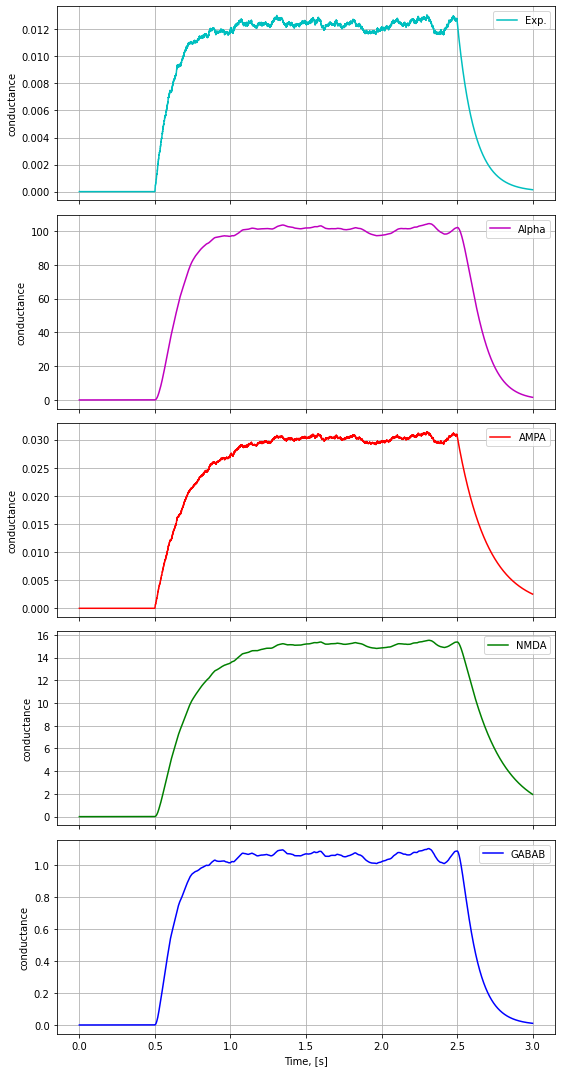

In [23]:
fig, axes = plot_multiple(
    t,
    (record[Exponential].mean(axis=0), {'color':'c', 'label':'Exp.', 'ylabel': 'conductance'}),
    (record[Alpha].mean(axis=0), {'color':'m', 'label':'Alpha', 'ylabel': 'conductance'}),
    (record[AMPA].mean(axis=0), {'color':'r', 'label':'AMPA', 'ylabel': 'conductance'}),
    (record[NMDA].mean(axis=0), {'color':'g', 'label':'NMDA', 'ylabel': 'conductance'}),
    (record[GABAB].mean(axis=0), {'color':'b', 'label':'GABAB', 'ylabel': 'conductance'}),
    figw=8, figh=3, sharex=True
)